In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.formula.api as smf

In [75]:
#a
auto = pd.read_csv(r'Auto.csv')
print(auto.shape)
auto.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [76]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [77]:
#horsepower is of type object, it needs to be int or float to be able to fit for regression


In [78]:
auto['horsepower'] = auto['horsepower'].replace('?',np.nan)
auto.dropna(inplace = True)

In [79]:
auto['horsepower'] = auto['horsepower'].astype('float')


In [80]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [81]:
result = smf.ols('mpg ~ horsepower',data = auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           7.03e-81
Time:                        05:29:53   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [82]:
#i 
#Since there is a non negative ceofficient, there is a realtionship between predictor and response


In [83]:
#ii
# we can meauser the overall fit by R2 value, since R2 value is 0.60, we say that 60% of invariability is 
# explained by the predictor

In [84]:
#iii
# the value of the coefficient is -0.1578, hence the relationship is negative.


In [85]:
# i am not sure about how to find prediction with a given confidence. For this question i am using a model, to train
# and then predict an answer
model = LinearRegression()
model.fit(auto['horsepower'].to_frame(),auto['mpg'])
model.predict(pd.Series([98]).to_frame())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([24.46707715])

In [86]:
# we are getting the answer as 24.46 ,but we can't be sure about the confidence in the prediction and the resulting range 
# of the confidence

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


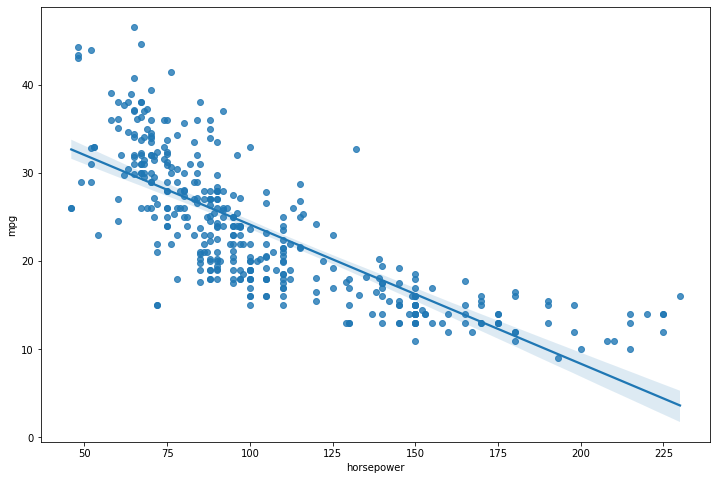

In [87]:
#b
plt.figure(figsize = (12,8))
sns.regplot(auto['horsepower'],auto['mpg'])

In [88]:
#c
# Diagnostic plots cnotains four types of plot, residual vs fitted,normal q-q, scale-location,residuals vs leverage
# Here i am plotting the first two graphs
# one can refer to the link below to get more information 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Residual Plot')

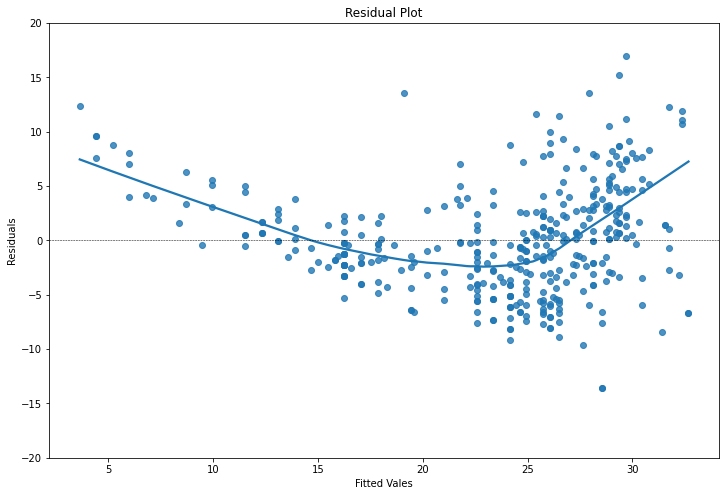

In [89]:
#dist of residuals
plt.figure(figsize = (12,8))
plt.ylim(-20,20)
sns.regplot(result.fittedvalues,result.resid, lowess=True)
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'black')
plt.xlabel('Fitted Vales')
plt.ylabel('Residuals')
plt.title('Residual Plot')

In [90]:
# the distribution has some kind of pattern

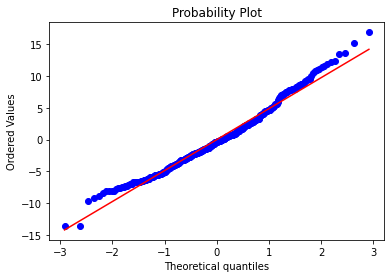

In [91]:
# Q-Q plot
ax = stats.probplot(result.resid, dist='norm', plot=plt)

In [92]:
# the q-q polt is close to ideal.

In [93]:
#9
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


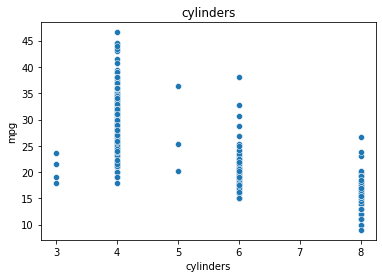

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


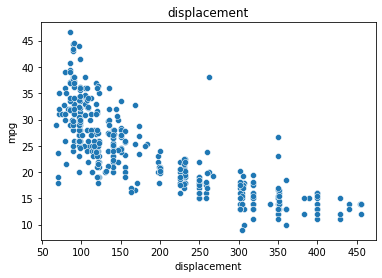

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


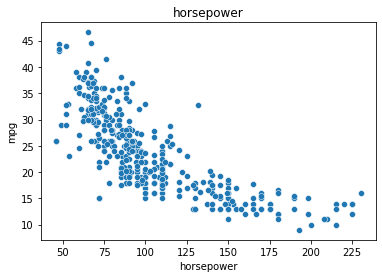

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


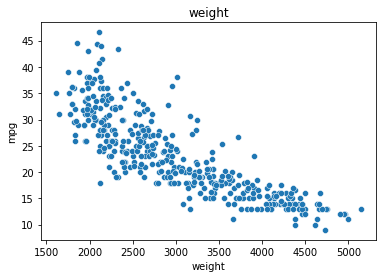

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


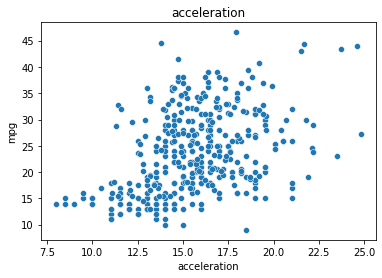

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


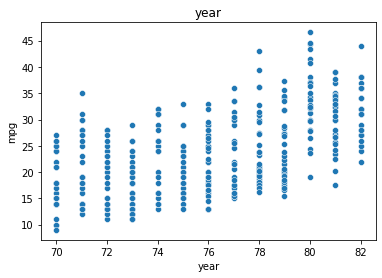

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


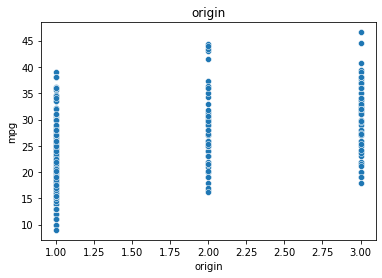

In [94]:
#a
for col in auto.iloc[:,1:8].columns:
    sns.scatterplot(auto[col],auto['mpg'])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('mpg')
    plt.show()

In [95]:
#b
auto.iloc[:,:-1].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


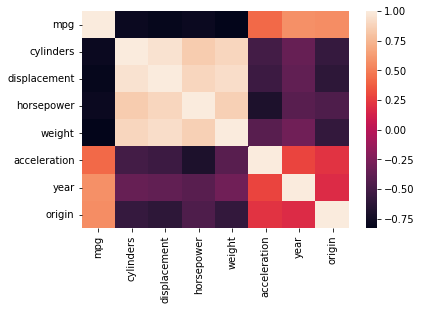

In [96]:
sns.heatmap(auto.iloc[:,:-1].corr())

In [97]:
#c
predictors = ' + '.join(auto.columns.difference(['name','mpg']))
result = smf.ols('mpg ~ {}'.format(predictors),data = auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          2.04e-139
Time:                        05:30:32   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

In [98]:
#i
# since we are having non zero ceoffiencts, there is a relationship between the predictors and response.
# also the value of f statistic is quite high, which supports the claim.

In [99]:
#ii
# Origin,weight, year have very significan p value of 0, displacement also has a very low p value.

In [100]:
#iii
# Coefficient of year is 0.7508. It means that if we increase the value of year by i unit, kepping all other predictors fixec,
# we would expect 0.7508 increase in the response.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Residual Plot')

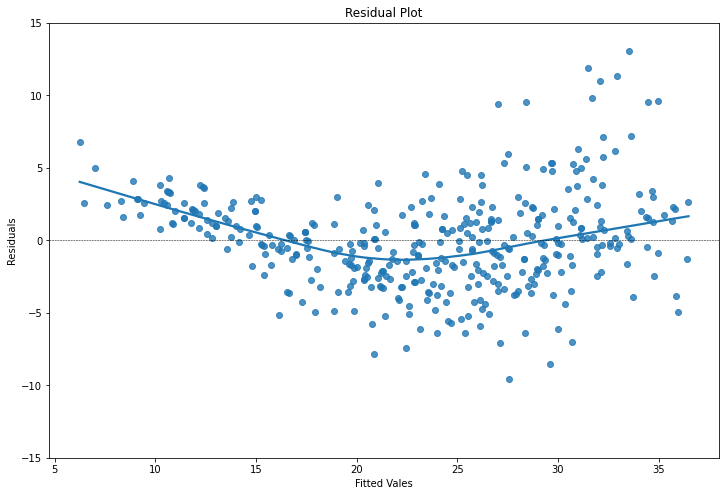

In [101]:
#d
#diagnotis plot
#dist of residuals
plt.figure(figsize = (12,8))
plt.ylim(-15,15)
sns.regplot(result.fittedvalues,result.resid, lowess=True)
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'black')
plt.xlabel('Fitted Vales')
plt.ylabel('Residuals')
plt.title('Residual Plot')

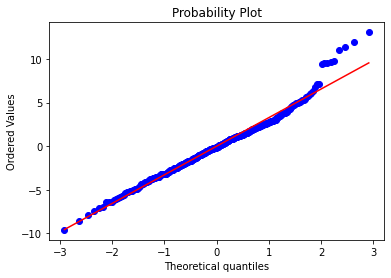

In [102]:
# Q-Q plot
ax = stats.probplot(result.resid, dist='norm', plot=plt)

In [103]:
# in both of the graphs we can see some points in the uppwe right corner behaving as outliers
# Q-Q plot is very colse to  the ideal, and the residuals distribution plot is also accetable

In [104]:
#e
predictors = ' + '.join(auto.columns.difference(['name','mpg']))
result = smf.ols('mpg ~ {} + horsepower*cylinders + horsepower*year'.format(predictors),data = auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     283.1
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          5.43e-163
Time:                        05:30:48   Log-Likelihood:                -961.89
No. Observations:                 392   AIC:                             1944.
Df Residuals:                     382   BIC:                             1983.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -40.8773 

In [105]:
# we have added two tersms, horsepower*cyllinder and horsepower*year, for both of these the p values are significant
# Adding the interaction terms has resulted in the increase of R2 value from 82.1 to 87.0

In [106]:
#f
predictors = ' + '.join(auto.columns.difference(['name','mpg']))
result = smf.ols('mpg ~ {} + horsepower*cylinders + np.power(horsepower,2)'.format(predictors),data = auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          6.47e-159
Time:                        05:30:52   Log-Likelihood:                -971.55
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     382   BIC:                             2003.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [107]:
# we saw in the chapter how the scatterplot between horsepower and mpg hinted a non linear realtionship
# by adding a new term which is horsepower**2, we saw an increase in R2 value increase from 82.1 to 86.3

In [108]:
#10
data = pd.read_csv('Carseats.csv')
print(data.shape)
data.head()


(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [109]:
shelveloc_mapping = {'Bad':0,'Good':1,'Medium':2}
yes_no_mapping = {'Yes':1,'No':0}

In [110]:
data['ShelveLoc'] = data['ShelveLoc'].map(shelveloc_mapping)

In [111]:
data['Urban'] = data['Urban'].map(yes_no_mapping)
data['US'] = data['US'].map(yes_no_mapping)

In [112]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [113]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

In [114]:
# we now a complete quantative data

In [115]:
#a
result = smf.ols('Sales ~ Price + Urban + US',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           2.39e-23
Time:                        05:31:09   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

In [116]:
#b
# from the coeffiecents we can see that  the Price and Urban are negatively related to Sales, and US is positively related
# Looking at the p values, Price and Us have significant p-values, but Urban has a very high p values ,and its 
# better that we exclude it from the model

In [117]:
#cd
# although all the predictors are having coefficients non zero, but since Urban has a high value, we will not use it as a 
# predictor

In [118]:
#e
result = smf.ols('Sales ~ Price + US',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           2.66e-24
Time:                        05:31:15   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [119]:
#f
# Removing the Urban from the first model, there is no change in the R2 value in the second model. Through this we can also 
# conclude that Urban has no say in the prediction of the response, hence its better to use the model with two predictors

In [120]:
#g
# for 95% of confidence value we calculate the range of x +/- 2*stddev(x)

In [121]:
coeff_price = -0.0545
std_price = 0.005
range_price = [coeff_price - 2*std_price,coeff_price + 2*std_price]

coeff_US = 1.1996
std_US = 0.258
range_US = [coeff_US - 2*std_US,coeff_US + 2*std_US]

print('With 95% confidence the range for Price coefficient is ',range_price)
print('With 95% confidence the range for US coefficent is ',range_US)

With 95% confidence the range for Price coefficient is  [-0.0645, -0.0445]
With 95% confidence the range for US coefficent is  [0.6836, 1.7156]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Residual Plot')

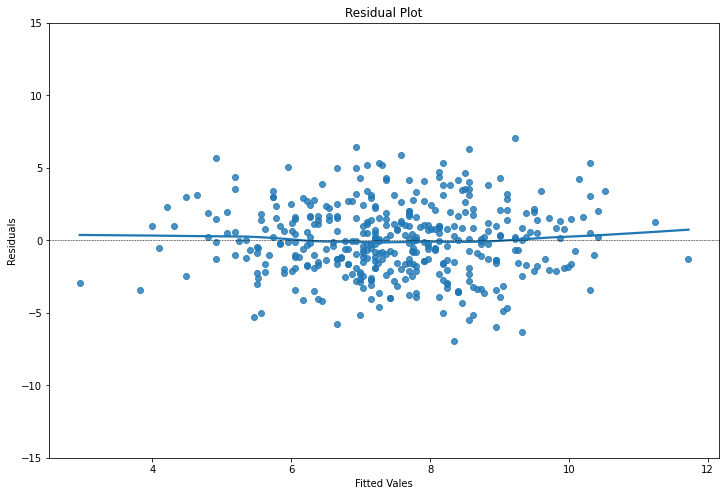

In [122]:
#h
#dist of residuals
plt.figure(figsize = (12,8))
plt.ylim(-15,15)
sns.regplot(result.fittedvalues,result.resid, lowess=True)
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'black')
plt.xlabel('Fitted Vales')
plt.ylabel('Residuals')
plt.title('Residual Plot')

In [123]:
#from the graph, we can see its a good fit, and there is no pattern
